In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import os
import sys
from matplotlib.ticker import FuncFormatter
import time
from datetime import datetime, timedelta
import matplotlib.dates as mdates
sys.path.append('..')
from functions import *

Available keys in data: dict_keys(['Carbon Dioxide', 'Carbon Monoxide', 'LCS0076', 'LCS0104', 'Nitrogen Dioxide', 'PM25', 'Relative Humidity', 'Temperature', 'Wind Direction'])


,timestamp,GNSS_LAT,GNSS_LON,SHTC3_RH,SHTC3_T,SPS30_PM1,SPS30_PM10,SPS30_PM2.5,SPS30_PM4,SPS30_PN0.5,...,SPS30_PN10,SPS30_PN2.5,SPS30_PN4,VEML6040_AL,VEML6040_Blue,VEML6040_ColorTemp,VEML6040_Green,VEML6040_RED,VEML6040_White,signalQuality
0,2024-09-16 02:00:00,55.70170975,12.5458498,33.86,28.04,0.71,0.98,0.85,0.93,4.73,...,5.66,5.63,5.65,11.65,107,35918,293,127,343,18
1,2024-09-16 02:05:00,55.70170975,12.5458498,33.86,28.03,1.26,1.56,1.44,1.52,8.53,...,10.08,10.05,10.07,12.53,109,31111,326,136,375,18
2,2024-09-16 02:10:00,55.70190811,12.5458498,33.86,28.03,0.74,1.43,1.07,1.31,4.59,...,5.96,5.89,5.95,12.52,109,28551,326,135,373,18
3,2024-09-16 02:15:00,55.70215988,12.54559994,33.82,28.05,0.86,1.88,1.34,1.70,4.98,...,6.92,6.80,6.90,12.53,109,34447,326,136,374,18
4,2024-09-16 02:20:00,55.70215988,12.54559994,33.83,28.04,1.75,2.26,2.03,2.18,11.66,...,13.95,13.90,13.94,12.53,109,32531,326,136,374,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2024-09-19 21:55:00,NaN,NaN,37.07,31.48,1.65,2.68,2.16,2.50,10.63,...,13.25,13.13,13.22,12.15,126,12484,374,217,449,26
4517,2024-09-19 21:56:00,NaN,NaN,37.07,31.48,1.76,2.39,2.10,2.29,11.64,...,14.07,14.00,14.06,12.13,127,13909,373,218,449,26
4518,2024-09-19 21:57:00,NaN,NaN,36.96,31.54,2.19,2.71,2.49,2.64,14.78,...,17.50,17.44,17.49,12.10,129,15545,375,220,450,26
4519,2024-09-19 21:58:00,NaN,NaN,37.01,31.51,1.81,2.70,2.27,2.56,11.62,...,14.51,14.41,14.49,12.14,125,12992,373,217,449,26


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

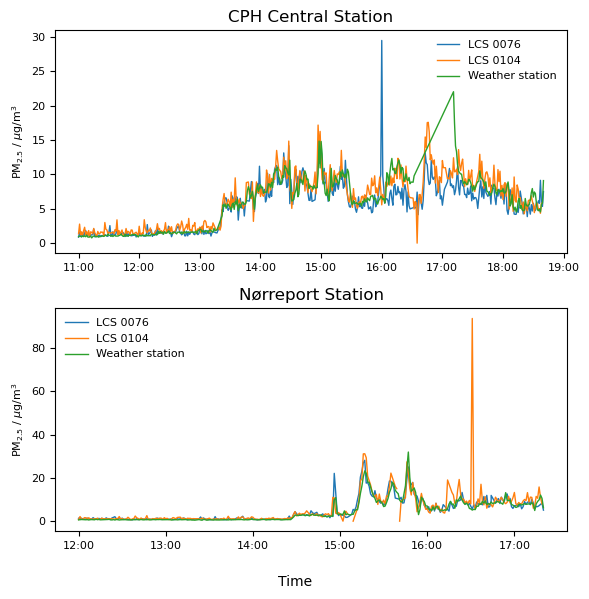

In [2]:
start_time = ['2024-09-17 11:00', '2024-09-19 12:00']
end_time = ['2024-09-17 18:40', '2024-09-19 17:20']

fig, ax = plt.subplots(2,1, figsize = (6, 6))

titles = ['CPH Central Station', 'Nørreport Station']
plot_LCS_WS(ax, fig, data, start_time, end_time, titles)

fig.tight_layout()
fig.savefig('LCS_WS.png')
plt.show()

In [3]:
# CPH Central:
timestamp = np.array(['11:36:', '11:48:', '11:54:', '12:01:', '12:39:', '12:50:', '12:56:', '13:11:', 
                       '13:30:', '13:45:', '13:49', '14:03:', '14:06:', '14:21', '14:24', '14:39', '14:42', '14:57', '15:00', '15:15', '15:18', '15:32', '15:40', '15:49',
                       '16:05', '16:20', '16:23', '16:38', '16:41', '16:56', '16:59', '17:14', '17:17', '17:32', '17:33', '17:50', '18:15', '18:27'], dtype = object)

LCS_mean_PM25 = get_mean_conc(data, ['LCS0076', 'LCS0104'], 'timestamp', '2024-09-17 ', timestamp, 'SPS30_PM2.5', 'LCS_PM25_CPHcentral.csv')
display(LCS_mean_PM25)

Indexes for LCS0076: [1301. 1313. 1319. 1326. 1364. 1375. 1381. 1396. 1413. 1428. 1430. 1444.
 1447. 1461. 1464. 1479. 1482. 1495. 1498. 1513. 1516. 1529. 1537. 1546.
 1560. 1575. 1578. 1592. 1595. 1610. 1613. 1625. 1628. 1643. 1644. 1659.
 1682. 1694.]
Indexes for LCS0104: [1301. 1313. 1319. 1326. 1364. 1375. 1381. 1396. 1413. 1428. 1431. 1445.
 1448. 1462. 1465. 1480. 1483. 1496. 1499. 1514. 1517. 1527. 1535. 1544.
 1559. 1574. 1577. 1590. 1593. 1608. 1611. 1625. 1628. 1643. 1644. 1659.
 1683. 1695.]


,LCS0076 time start,LCS0076 time end,LCS0076,LCS0104 time start,LCS0104 time end,LCS0104
0,2024-09-17 11:36:00,2024-09-17 11:48:00,1.395000,2024-09-17 11:36:00,2024-09-17 11:48:00,1.736667
1,2024-09-17 11:54:00,2024-09-17 12:01:00,1.224286,2024-09-17 11:54:00,2024-09-17 12:01:00,1.527143
2,2024-09-17 12:39:00,2024-09-17 12:50:00,1.512727,2024-09-17 12:39:00,2024-09-17 12:50:00,2.451818
3,2024-09-17 12:56:00,2024-09-17 13:11:00,1.664000,2024-09-17 12:56:00,2024-09-17 13:11:00,2.249333
4,2024-09-17 13:30:00,2024-09-17 13:45:00,5.539333,2024-09-17 13:30:00,2024-09-17 13:45:00,6.083333
5,2024-09-17 13:49:00,2024-09-17 14:03:00,7.375714,2024-09-17 13:49:00,2024-09-17 14:03:00,7.134286
6,2024-09-17 14:06:00,2024-09-17 14:21:00,8.749286,2024-09-17 14:06:00,2024-09-17 14:21:00,9.990000
7,2024-09-17 14:24:00,2024-09-17 14:39:00,8.912667,2024-09-17 14:24:00,2024-09-17 14:39:00,9.250667
8,2024-09-17 14:42:00,2024-09-17 14:57:00,7.929231,2024-09-17 14:42:00,2024-09-17 14:57:00,8.797692
9,2024-09-17 15:00:00,2024-09-17 15:15:00,8.743333,2024-09-17 15:00:00,2024-09-17 15:15:00,9.410000


In [4]:
# CPH Central:
timestamp = np.array(['11:36:', '11:48:', '11:54:', '12:01:', '12:39:', '12:50:', '12:56:', '13:11:', 
                       '13:30:', '13:45:', '13:49', '14:03:', '14:06:', '14:21', '14:24', '14:39', '14:42', '14:57', '15:00', '15:15', '15:18', '15:32', '15:40', '15:49',
                       '16:05', '16:20', '16:23', '16:38', '16:41', '16:56', '16:59', '17:14', '17:17', '17:32', '17:33', '17:50', '18:15', '18:27'], dtype = object)

LCS_mean_PM1 = get_mean_conc(data, ['LCS0076', 'LCS0104'], 'timestamp', '2024-09-17 ', timestamp, 'SPS30_PM1', 'LCS_PM1_CPHcentral.csv')
display(LCS_mean_PM1)

Indexes for LCS0076: [1301. 1313. 1319. 1326. 1364. 1375. 1381. 1396. 1413. 1428. 1430. 1444.
 1447. 1461. 1464. 1479. 1482. 1495. 1498. 1513. 1516. 1529. 1537. 1546.
 1560. 1575. 1578. 1592. 1595. 1610. 1613. 1625. 1628. 1643. 1644. 1659.
 1682. 1694.]
Indexes for LCS0104: [1301. 1313. 1319. 1326. 1364. 1375. 1381. 1396. 1413. 1428. 1431. 1445.
 1448. 1462. 1465. 1480. 1483. 1496. 1499. 1514. 1517. 1527. 1535. 1544.
 1559. 1574. 1577. 1590. 1593. 1608. 1611. 1625. 1628. 1643. 1644. 1659.
 1683. 1695.]


,LCS0076 time start,LCS0076 time end,LCS0076,LCS0104 time start,LCS0104 time end,LCS0104
0,2024-09-17 11:36:00,2024-09-17 11:48:00,1.022500,2024-09-17 11:36:00,2024-09-17 11:48:00,1.404167
1,2024-09-17 11:54:00,2024-09-17 12:01:00,0.945714,2024-09-17 11:54:00,2024-09-17 12:01:00,1.221429
2,2024-09-17 12:39:00,2024-09-17 12:50:00,1.214545,2024-09-17 12:39:00,2024-09-17 12:50:00,2.022727
3,2024-09-17 12:56:00,2024-09-17 13:11:00,1.346667,2024-09-17 12:56:00,2024-09-17 13:11:00,1.956667
4,2024-09-17 13:30:00,2024-09-17 13:45:00,4.873333,2024-09-17 13:30:00,2024-09-17 13:45:00,5.579333
5,2024-09-17 13:49:00,2024-09-17 14:03:00,6.710000,2024-09-17 13:49:00,2024-09-17 14:03:00,6.422857
6,2024-09-17 14:06:00,2024-09-17 14:21:00,8.077143,2024-09-17 14:06:00,2024-09-17 14:21:00,9.154286
7,2024-09-17 14:24:00,2024-09-17 14:39:00,7.945333,2024-09-17 14:24:00,2024-09-17 14:39:00,8.378000
8,2024-09-17 14:42:00,2024-09-17 14:57:00,7.270000,2024-09-17 14:42:00,2024-09-17 14:57:00,8.036923
9,2024-09-17 15:00:00,2024-09-17 15:15:00,7.904000,2024-09-17 15:00:00,2024-09-17 15:15:00,8.626000


In [5]:
# CPH Central:
timestamp = np.array(['11:36:', '11:48:', '11:54:', '12:01:', '12:39:', '12:50:', '12:56:', '13:11:', 
                       '13:30:', '13:45:', '13:49', '14:03:', '14:06:', '14:21', '14:24', '14:39', '14:42', '14:57', '15:00', '15:15', '15:18', '15:32', '15:40', '15:49',
                       '16:05', '16:20', '16:23', '16:38', '16:41', '16:56', '16:59', '17:14', '17:17', '17:32', '17:33', '17:50', '18:15', '18:27'], dtype = object)

WS_labels = ['Carbon Dioxide', 'Carbon Monoxide', 'Nitrogen Dioxide', 'PM25']
WS_mean = get_mean_conc(data, WS_labels, 'timestamp', '2024-09-17 ', timestamp, 'Conc', 'WS_CPHcentral.csv')
display(WS_mean)

Indexes for Carbon Dioxide: [1084. 1096. 1102. 1109. 1147. 1158. 1164. 1179. 1194. 1209. 1213. 1227.
 1230. 1245. 1248. 1263. 1266. 1281. 1284. 1299. 1302. 1314. 1322. 1331.
 1347. 1362. 1365.    0.    0.    0.    0. 1378. 1381. 1396. 1397. 1414.
 1439. 1451.]
Indexes for Carbon Monoxide: [ 606.  618.  624.  631.  669.  680.  686.  701.  718.  733.  737.  751.
  754.  769.  772.  787.  790.  805.  808.  823.  826.  840.  848.  857.
  873.  888.  891.  906.  909.  924.  927.  942.  945.  960.  961.  978.
 1003. 1015.]
Indexes for Nitrogen Dioxide: [1084. 1096. 1102. 1109. 1147. 1158. 1164. 1179. 1194. 1209. 1213. 1227.
 1230. 1245. 1248. 1263. 1266. 1281. 1284. 1299. 1302. 1314. 1322. 1331.
 1347. 1362. 1365.    0.    0.    0.    0. 1378. 1381. 1396. 1397. 1414.
 1439. 1451.]
Indexes for PM25: [1084. 1096. 1102. 1109. 1147. 1158. 1164. 1179. 1194. 1209. 1213. 1227.
 1230. 1245. 1248. 1263. 1266. 1281. 1284. 1299. 1302. 1314. 1322. 1331.
 1347. 1362. 1365.    0.    0.    0.    0. 1378. 1

,Carbon Dioxide time start,Carbon Dioxide time end,Carbon Dioxide,Carbon Monoxide time start,Carbon Monoxide time end,Carbon Monoxide,Nitrogen Dioxide time start,Nitrogen Dioxide time end,Nitrogen Dioxide,PM25 time start,PM25 time end,PM25
0,2024-09-17 11:36:00,2024-09-17 11:48:00,564.192261,2024-09-17 11:36:00,2024-09-17 11:48:00,1.272961,2024-09-17 11:36:00,2024-09-17 11:48:00,12.431667,2024-09-17 11:36:00,2024-09-17 11:48:00,1.098740
1,2024-09-17 11:54:00,2024-09-17 12:01:00,570.672729,2024-09-17 11:54:00,2024-09-17 12:01:00,1.276977,2024-09-17 11:54:00,2024-09-17 12:01:00,12.395714,2024-09-17 11:54:00,2024-09-17 12:01:00,1.130364
2,2024-09-17 12:39:00,2024-09-17 12:50:00,587.709351,2024-09-17 12:39:00,2024-09-17 12:50:00,1.288732,2024-09-17 12:39:00,2024-09-17 12:50:00,11.180000,2024-09-17 12:39:00,2024-09-17 12:50:00,1.554340
3,2024-09-17 12:56:00,2024-09-17 13:11:00,614.477917,2024-09-17 12:56:00,2024-09-17 13:11:00,1.290962,2024-09-17 12:56:00,2024-09-17 13:11:00,11.079333,2024-09-17 12:56:00,2024-09-17 13:11:00,1.752035
4,2024-09-17 13:30:00,2024-09-17 13:45:00,671.917777,2024-09-17 13:30:00,2024-09-17 13:45:00,1.288165,2024-09-17 13:30:00,2024-09-17 13:45:00,19.255333,2024-09-17 13:30:00,2024-09-17 13:45:00,5.539300
5,2024-09-17 13:49:00,2024-09-17 14:03:00,736.692126,2024-09-17 13:49:00,2024-09-17 14:03:00,1.288855,2024-09-17 13:49:00,2024-09-17 14:03:00,18.933571,2024-09-17 13:49:00,2024-09-17 14:03:00,7.389450
6,2024-09-17 14:06:00,2024-09-17 14:21:00,683.102507,2024-09-17 14:06:00,2024-09-17 14:21:00,1.297735,2024-09-17 14:06:00,2024-09-17 14:21:00,12.630667,2024-09-17 14:06:00,2024-09-17 14:21:00,9.191208
7,2024-09-17 14:24:00,2024-09-17 14:39:00,693.328084,2024-09-17 14:24:00,2024-09-17 14:39:00,1.300056,2024-09-17 14:24:00,2024-09-17 14:39:00,18.193333,2024-09-17 14:24:00,2024-09-17 14:39:00,8.587612
8,2024-09-17 14:42:00,2024-09-17 14:57:00,818.887952,2024-09-17 14:42:00,2024-09-17 14:57:00,1.300779,2024-09-17 14:42:00,2024-09-17 14:57:00,15.396000,2024-09-17 14:42:00,2024-09-17 14:57:00,8.708356
9,2024-09-17 15:00:00,2024-09-17 15:15:00,672.921484,2024-09-17 15:00:00,2024-09-17 15:15:00,1.301503,2024-09-17 15:00:00,2024-09-17 15:15:00,11.902667,2024-09-17 15:00:00,2024-09-17 15:15:00,8.991473


In [6]:
# Nørreport:
timestamp = np.array(['12:41', '12:45', '12:45', '12:55', '13:09', '13:50', '13:56', '14:11', '14:15', '14:30', '13:34', '14:50', '14:54', '15:09',
                       '15:55', '16:10', '16:11', '16:29', '16:51', '17:08', '16:31', '16:49'], dtype = object)	

LCS_mean_PM1 = get_mean_conc(data, ['LCS0076', 'LCS0104'], 'timestamp', '2024-09-19 ', timestamp, 'SPS30_PM1', 'LCS_PM1_Nørreport.csv')
display(LCS_mean_PM1)

Indexes for LCS0076: [3984. 3988. 3988. 3998. 4012. 4053. 4059. 4074. 4078. 4093. 4037. 4112.
 4116. 4130. 4173. 4188. 4189. 4204. 4225. 4242. 4206. 4223.]
Indexes for LCS0104: [4003. 4007. 4007. 4017. 4031. 4072. 4078. 4093. 4097. 4112. 4056. 4131.
 4135. 4147. 4189. 4204. 4205. 4221. 4242. 4259. 4223. 4240.]


,LCS0076 time start,LCS0076 time end,LCS0076,LCS0104 time start,LCS0104 time end,LCS0104
0,2024-09-19 12:41:00,2024-09-19 12:45:00,0.570000,2024-09-19 12:41:00,2024-09-19 12:45:00,0.762500
1,2024-09-19 12:45:00,2024-09-19 12:55:00,0.739000,2024-09-19 12:45:00,2024-09-19 12:55:00,0.913000
2,2024-09-19 13:09:00,2024-09-19 13:50:00,0.667073,2024-09-19 13:09:00,2024-09-19 13:50:00,0.827561
3,2024-09-19 13:56:00,2024-09-19 14:11:00,0.622000,2024-09-19 13:56:00,2024-09-19 14:11:00,0.816667
4,2024-09-19 14:15:00,2024-09-19 14:30:00,1.071333,2024-09-19 14:15:00,2024-09-19 14:30:00,1.203333
5,2024-09-19 13:34:00,2024-09-19 14:50:00,1.261067,2024-09-19 13:34:00,2024-09-19 14:50:00,1.356667
6,2024-09-19 14:54:00,2024-09-19 15:09:00,4.027857,2024-09-19 14:54:00,2024-09-19 15:09:00,4.065455
7,2024-09-19 15:55:00,2024-09-19 16:10:00,5.808667,2024-09-19 15:55:00,2024-09-19 16:10:00,6.275333
8,2024-09-19 16:11:00,2024-09-19 16:29:00,7.679333,2024-09-19 16:11:00,2024-09-19 16:29:00,9.727500
9,2024-09-19 16:51:00,2024-09-19 17:08:00,7.707647,2024-09-19 16:51:00,2024-09-19 17:08:00,8.445294


In [7]:
# Nørreport:
timestamp = np.array(['12:41', '12:45', '12:45', '12:55', '13:09', '13:50', '13:56', '14:11', '14:15', '14:30', '13:34', '14:50', '14:54', '15:09',
                       '15:55', '16:10', '16:11', '16:29', '16:51', '17:08', '16:31', '16:49'], dtype = object)	

LCS_mean_PM25 = get_mean_conc(data, ['LCS0076', 'LCS0104'], 'timestamp', '2024-09-19 ', timestamp, 'SPS30_PM2.5', 'LCS_PM25_Nørreport.csv')
display(LCS_mean_PM25)

Indexes for LCS0076: [3984. 3988. 3988. 3998. 4012. 4053. 4059. 4074. 4078. 4093. 4037. 4112.
 4116. 4130. 4173. 4188. 4189. 4204. 4225. 4242. 4206. 4223.]
Indexes for LCS0104: [4003. 4007. 4007. 4017. 4031. 4072. 4078. 4093. 4097. 4112. 4056. 4131.
 4135. 4147. 4189. 4204. 4205. 4221. 4242. 4259. 4223. 4240.]


,LCS0076 time start,LCS0076 time end,LCS0076,LCS0104 time start,LCS0104 time end,LCS0104
0,2024-09-19 12:41:00,2024-09-19 12:45:00,0.930000,2024-09-19 12:41:00,2024-09-19 12:45:00,1.095000
1,2024-09-19 12:45:00,2024-09-19 12:55:00,0.955000,2024-09-19 12:45:00,2024-09-19 12:55:00,1.190000
2,2024-09-19 13:09:00,2024-09-19 13:50:00,1.000000,2024-09-19 13:09:00,2024-09-19 13:50:00,1.122683
3,2024-09-19 13:56:00,2024-09-19 14:11:00,0.885333,2024-09-19 13:56:00,2024-09-19 14:11:00,1.160000
4,2024-09-19 14:15:00,2024-09-19 14:30:00,1.462667,2024-09-19 14:15:00,2024-09-19 14:30:00,1.521333
5,2024-09-19 13:34:00,2024-09-19 14:50:00,1.645333,2024-09-19 13:34:00,2024-09-19 14:50:00,1.733067
6,2024-09-19 14:54:00,2024-09-19 15:09:00,4.752857,2024-09-19 14:54:00,2024-09-19 15:09:00,4.524545
7,2024-09-19 15:55:00,2024-09-19 16:10:00,6.542000,2024-09-19 15:55:00,2024-09-19 16:10:00,6.912667
8,2024-09-19 16:11:00,2024-09-19 16:29:00,8.288000,2024-09-19 16:11:00,2024-09-19 16:29:00,10.474375
9,2024-09-19 16:51:00,2024-09-19 17:08:00,8.557647,2024-09-19 16:51:00,2024-09-19 17:08:00,9.334118


In [8]:
# Nørreport:
timestamp = np.array(['12:41', '12:45', '12:45', '12:55', '13:09', '13:50', '13:56', '14:11', '14:15', '14:30', '13:34', '14:50', '14:54', '15:09',
                       '15:55', '16:10', '16:11', '16:29', '16:51', '17:08', '16:31', '16:49'], dtype = object)	

WS_mean = get_mean_conc(data, WS_labels, 'timestamp', '2024-09-19 ', timestamp, 'Conc', 'WS_Nørreport.csv')
display(WS_mean)

Indexes for Carbon Dioxide: [3970. 3974. 3974. 3984. 3998. 4039. 4045. 4060. 4064. 4079. 4023. 4099.
 4103. 4117. 4161. 4176. 4177. 4195. 4217. 4234. 4197. 4215.]
Indexes for Carbon Monoxide: [3496. 3500. 3500. 3510. 3524. 3565. 3571. 3586. 3590. 3605. 3549. 3625.
 3629. 3644. 3690. 3705. 3706. 3724. 3746. 3763. 3726. 3744.]
Indexes for Nitrogen Dioxide: [3970. 3974. 3974. 3984. 3998. 4039. 4045. 4060. 4064. 4079. 4023. 4099.
 4103. 4117. 4161. 4176. 4177. 4195. 4217. 4234. 4197. 4215.]
Indexes for PM25: [3970. 3974. 3974. 3984. 3998. 4039. 4045. 4060. 4064. 4079. 4023. 4099.
 4103. 4117. 4161. 4176. 4177. 4195. 4217. 4234. 4197. 4215.]


,Carbon Dioxide time start,Carbon Dioxide time end,Carbon Dioxide,Carbon Monoxide time start,Carbon Monoxide time end,Carbon Monoxide,Nitrogen Dioxide time start,Nitrogen Dioxide time end,Nitrogen Dioxide,PM25 time start,PM25 time end,PM25
0,2024-09-19 12:41:00,2024-09-19 12:45:00,694.176132,2024-09-19 12:41:00,2024-09-19 12:45:00,1.179735,2024-09-19 12:41:00,2024-09-19 12:45:00,11.262500,2024-09-19 12:41:00,2024-09-19 12:45:00,0.687903
1,2024-09-19 12:45:00,2024-09-19 12:55:00,696.613910,2024-09-19 12:45:00,2024-09-19 12:55:00,1.181439,2024-09-19 12:45:00,2024-09-19 12:55:00,11.062000,2024-09-19 12:45:00,2024-09-19 12:55:00,0.671885
2,2024-09-19 13:09:00,2024-09-19 13:50:00,584.094262,2024-09-19 13:09:00,2024-09-19 13:50:00,1.186555,2024-09-19 13:09:00,2024-09-19 13:50:00,10.381707,2024-09-19 13:09:00,2024-09-19 13:50:00,0.613950
3,2024-09-19 13:56:00,2024-09-19 14:11:00,704.776282,2024-09-19 13:56:00,2024-09-19 14:11:00,1.190302,2024-09-19 13:56:00,2024-09-19 14:11:00,10.722000,2024-09-19 13:56:00,2024-09-19 14:11:00,0.703824
4,2024-09-19 14:15:00,2024-09-19 14:30:00,638.160002,2024-09-19 14:15:00,2024-09-19 14:30:00,1.192042,2024-09-19 14:15:00,2024-09-19 14:30:00,11.043333,2024-09-19 14:15:00,2024-09-19 14:30:00,0.945861
5,2024-09-19 13:34:00,2024-09-19 14:50:00,630.517876,2024-09-19 13:34:00,2024-09-19 14:50:00,1.190856,2024-09-19 13:34:00,2024-09-19 14:50:00,11.567895,2024-09-19 13:34:00,2024-09-19 14:50:00,1.265881
6,2024-09-19 14:54:00,2024-09-19 15:09:00,651.638293,2024-09-19 14:54:00,2024-09-19 15:09:00,1.195013,2024-09-19 14:54:00,2024-09-19 15:09:00,15.852857,2024-09-19 14:54:00,2024-09-19 15:09:00,4.163382
7,2024-09-19 15:55:00,2024-09-19 16:10:00,715.160022,2024-09-19 15:55:00,2024-09-19 16:10:00,1.290733,2024-09-19 15:55:00,2024-09-19 16:10:00,26.048000,2024-09-19 15:55:00,2024-09-19 16:10:00,6.756234
8,2024-09-19 16:11:00,2024-09-19 16:29:00,689.362386,2024-09-19 16:11:00,2024-09-19 16:29:00,1.321323,2024-09-19 16:11:00,2024-09-19 16:29:00,37.027222,2024-09-19 16:11:00,2024-09-19 16:29:00,7.930424
9,2024-09-19 16:51:00,2024-09-19 17:08:00,677.485790,2024-09-19 16:51:00,2024-09-19 17:08:00,1.335106,2024-09-19 16:51:00,2024-09-19 17:08:00,28.691176,2024-09-19 16:51:00,2024-09-19 17:08:00,8.341079


Fit: a=0.967846  b=0.511  R2=0.896875


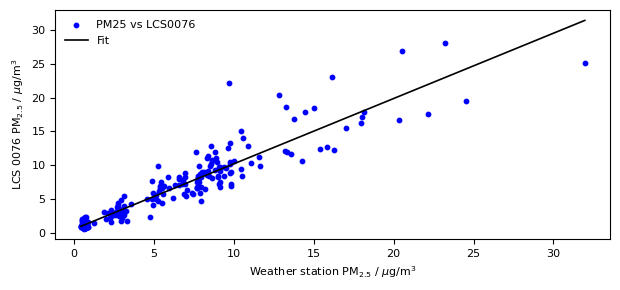

In [9]:
start_time = '2024-09-19 12:00'
end_time = '2024-09-19 17:20'

fig, ax = plt.subplots(figsize=(6.3, 3))

plot_reference_LCS(
    ax, 
    data, 
    ['PM25', 'LCS0076'], 
    start_time, 
    end_time, 
    ['Conc', 'SPS30_PM2.5'], 
    ['Weather station PM$_{2.5}$ / $\mu$g/m$^{3}$', 'LCS 0076 PM$_{2.5}$ / $\mu$g/m$^{3}$']
)
fig.tight_layout()
plt.show()
fig.savefig('LCS_vs_WS.png', dpi = 600)